# Semantic Dimensions Analysis

Import libraries

In [1]:
import numpy as np
from semantic_dimensions import analyze_word_relationship, compute_contraposition
from utils import load_model
from visualization_utils import plot_semantic_differences

Load Model

In [2]:
# pre-trained model
model_path = 'models/pretrained/word2vec/GoogleNews-vectors-negative300.bin.gz'  

model = load_model(model_path)

### Semantic Dimensions
Semantic dimensions are conceptual axes used to represent relationships and contrasts between words in a word embedding space. Each dimension captures a specific attribute or property of meaning, allowing us to analyze how words relate to each other along that dimension.

For now in this project we will focus on only demensions related to:
- Gender
- Formality
- Plurality

#### Testing

To test the results we are going to get we will first use 3 simple examples

- "assist", "help" -> We expect difference on FORMALITY
- "king", "queen" -> We expect difference on GENDER
- "teeth", "tooth" -> We expect difference on PLURALITY

In [3]:
data_test = [['assist','help'],
             ['king','queen'],
             ['teeth','tooth']]

### First Approach

Our first approach will consist on get to those dimensions using 2 techniques
- Definition (using a single word)  `model["gender"]` 
- Contraposition (using two words)  `model["female"] - model["male"]` 

In [4]:
# Define semantic dimensions
gender_contraposition = model["female"] - model["male"]
gender_definition = model["gender"] + 1e-9
formality_contraposition = model["polite"] - model["informal"]
formality_definition = model["polite"] + 1e-9
plural_contraposition = model["plural"] - model["singular"]
plural_definition = model["plural"] + 1e-9

SemanticDimensions = {
    'gender contraposition': gender_contraposition, 
    'gender definition': gender_definition, 
    'formality contraposition': formality_contraposition,
    'formality definition': formality_definition,
    'plural contraposition': plural_contraposition,
    'plural definition': plural_definition
}

# Normalize
for key, value in SemanticDimensions.items():
    SemanticDimensions[key] /= np.linalg.norm(value)

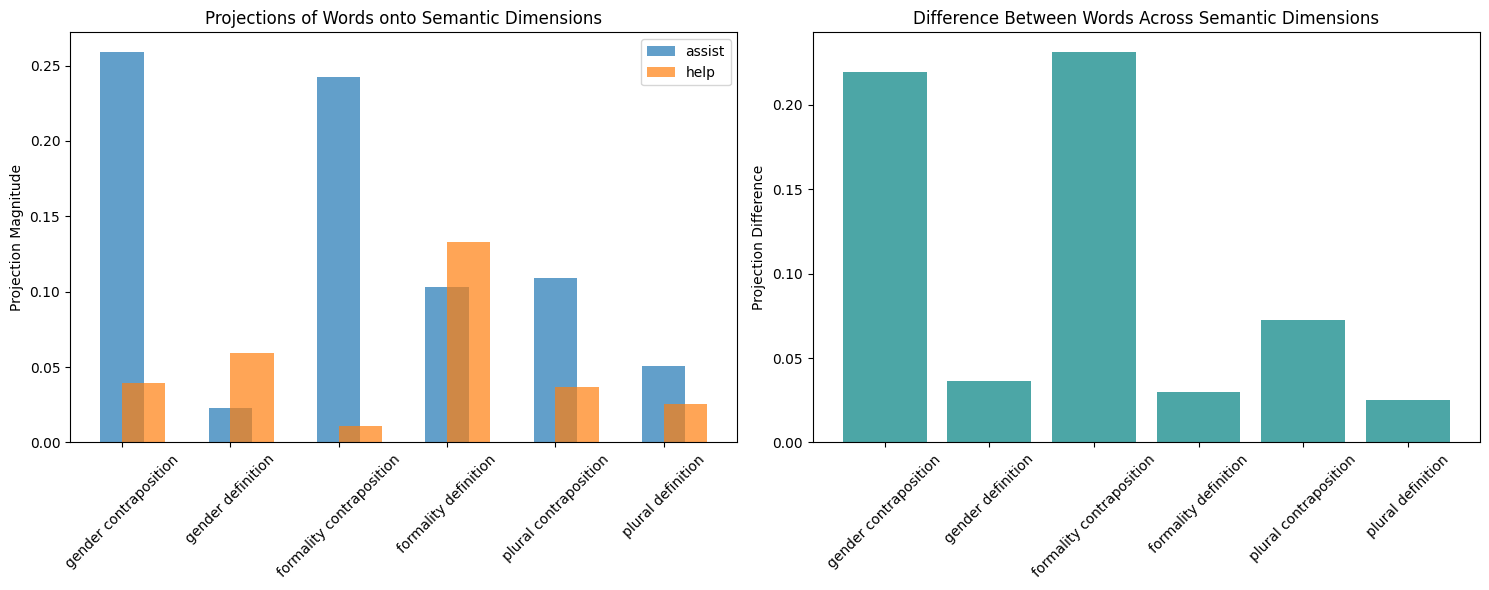

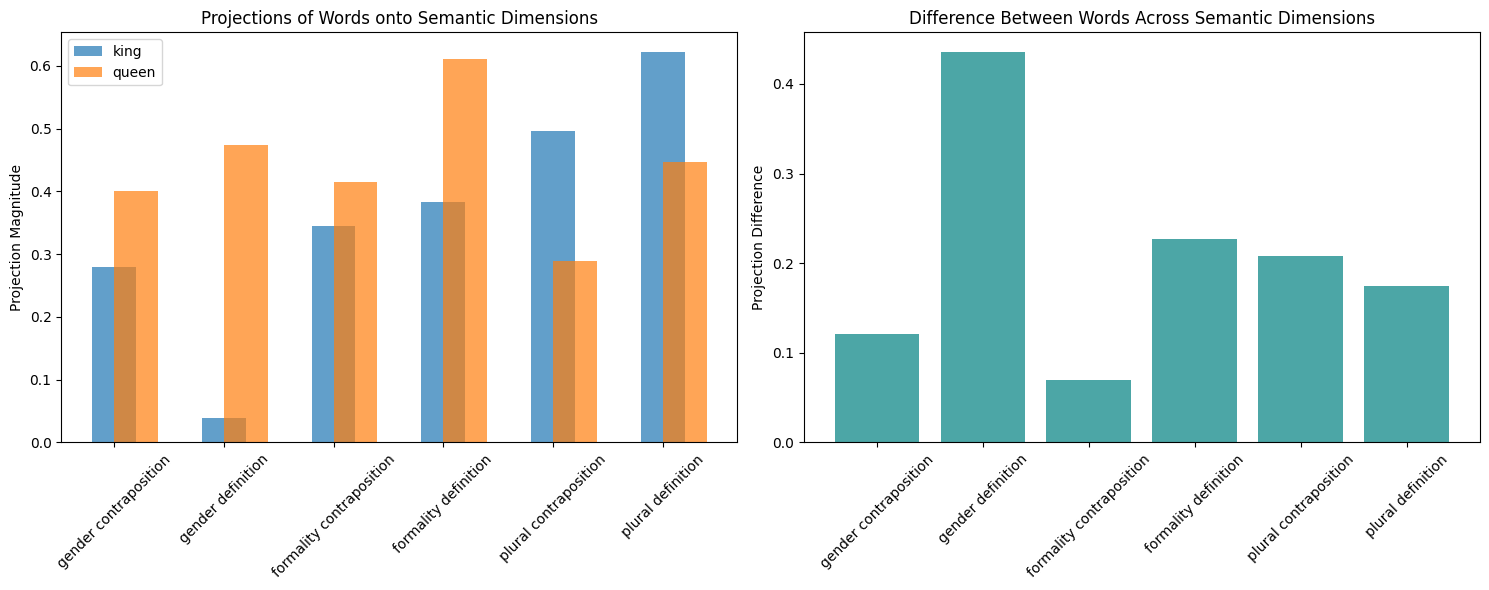

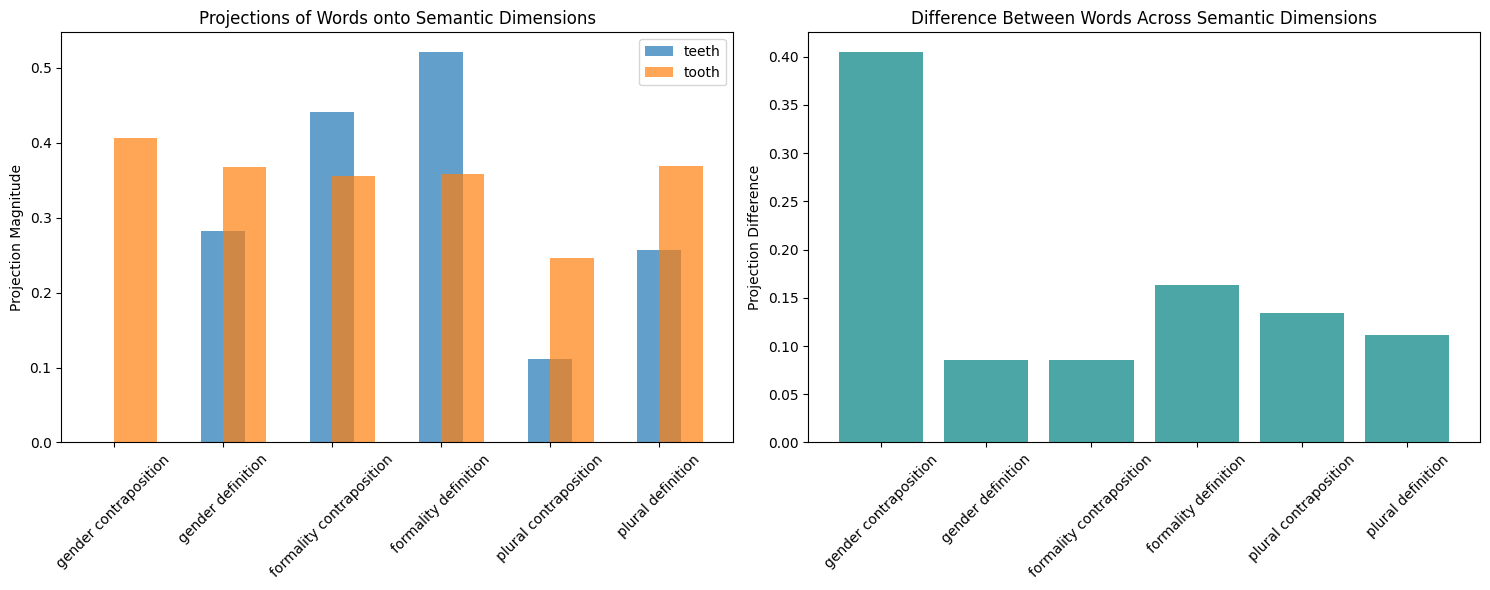

In [5]:
for word1, word2 in data_test:
    relationship = analyze_word_relationship(word1, word2, model, SemanticDimensions)
    plot_semantic_differences(relationship,word1,word2)

# we expect FORMALITY

We found really poor and unclear results

## Second approach

In [6]:
gender_positive = ["female", "woman", "girl", "mother", "sister"]
gender_negative = ["male", "man", "boy", "father", "brother"]

gender_contraposition = compute_contraposition(model, gender_positive, gender_negative)

formality_positive = ["formal", "official", "polite", "respectful", "ceremonial"]
formality_negative = ["casual", "informal", "relaxed", "friendly"]

formality_contraposition = compute_contraposition(model, formality_positive, formality_negative)

plural_positive = ["cats", "dogs", "children", "mice", "books"]
plural_negative = ["cat", "dog", "child", "mouse", "book"]

plural_contraposition = compute_contraposition(model, plural_positive, plural_negative)

SemanticDimensions2 = {
    "gender": gender_contraposition,
    "formality": formality_contraposition,
    "plurality": plural_contraposition,
}


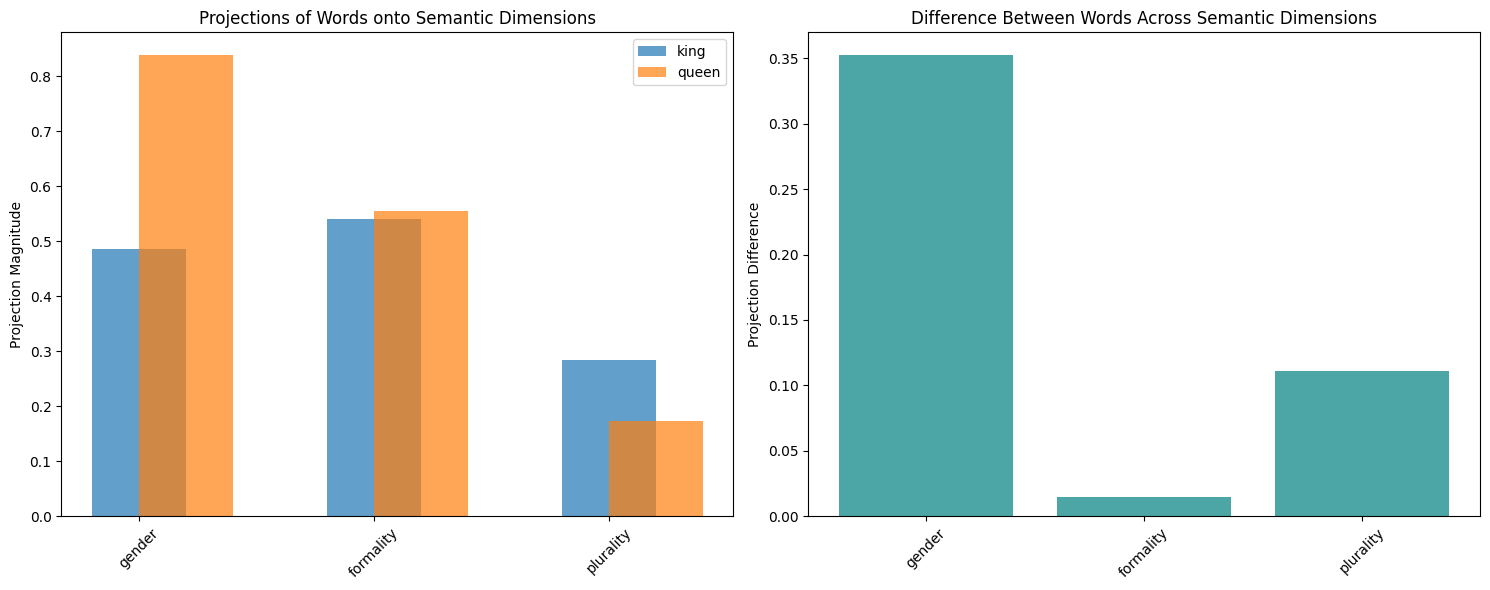

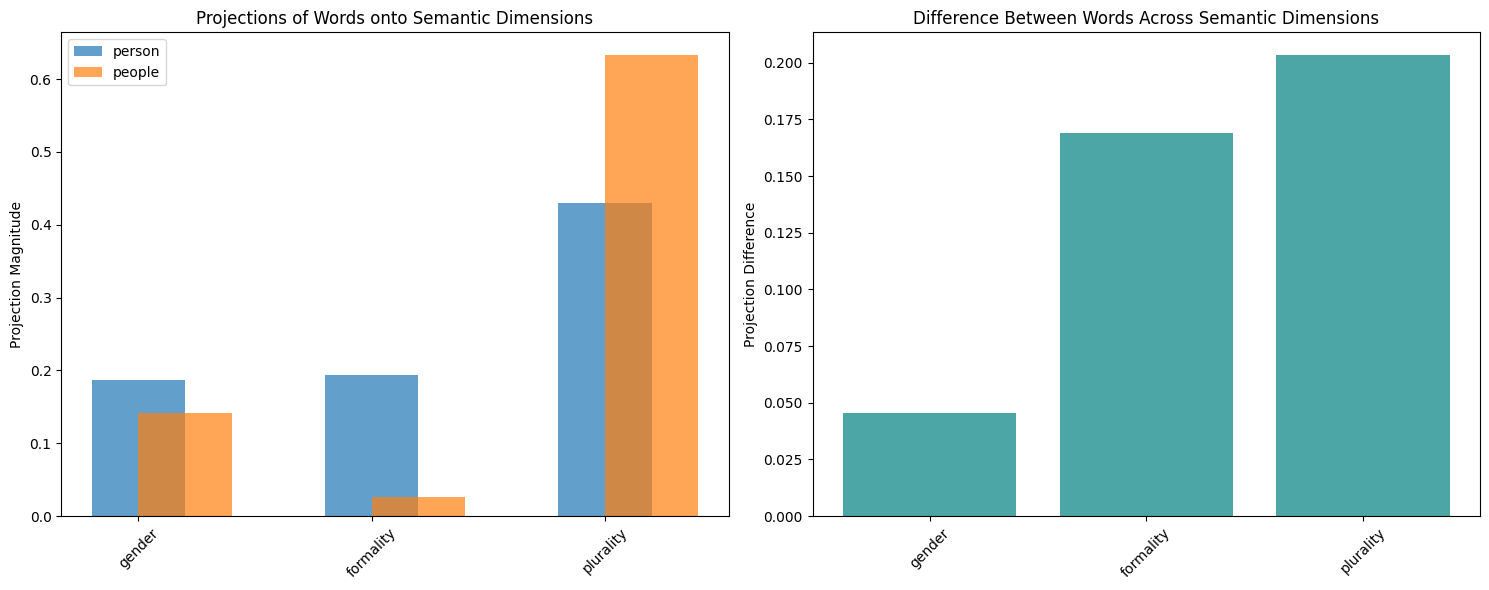

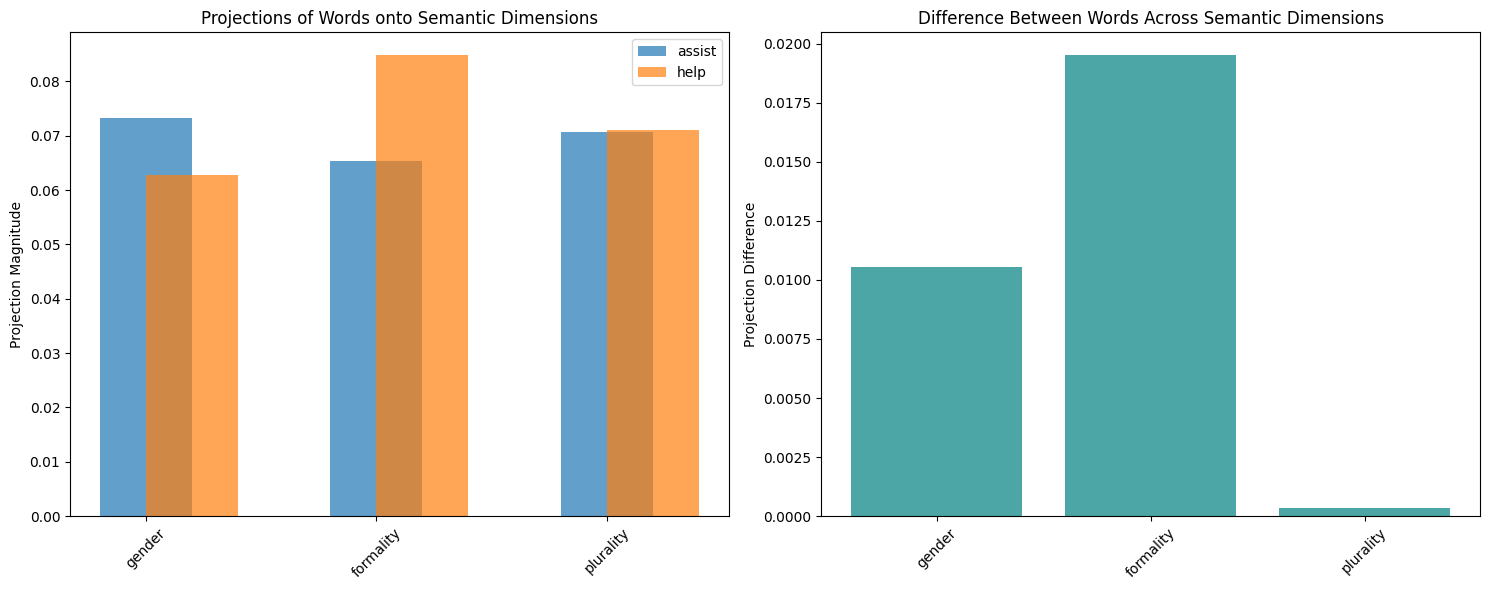

In [7]:
for word1, word2 in [("king", "queen"), ("person", "people"), ("assist", "help")]:
    relationship = analyze_word_relationship(word1, word2, model, SemanticDimensions2)
    plot_semantic_differences(relationship,word1,word2)

We obtained the results we wanted! 
We found that even tho we get good results, they are not super clear, so for example for the pair "person" , "people" , the gender difference is bigger than it should be

## Third approach

In [2]:
# pre-trained model
from utils import load_or_cache_model
model_path = 'models/pretrained/glove/glove.6B.300d.txt'  

model = load_or_cache_model(model_path, save_model=True, is_glove=True)

Loading cached model from models/pretrained/glove\model.pkl


In [26]:
import json
json_data = '''
{
    "gender": [
      ["wife", "husband"],
      ["daughter", "son"],
      ["girl", "boy"],
      ["sister", "brother"],
      ["mother", "father"],
      ["lady", "gentleman"],
      ["bride", "groom"],
      ["actress", "actor"],
      ["princess", "prince"],
      ["female", "male"],
      ["diva", "dude"],
      ["matron", "patron"],
      ["girlfriend", "boyfriend"],
      ["mom", "dad"],
      ["fiancée", "fiancé"],
      ["mother-in-law", "father-in-law"],
      ["widow", "widower"],
      ["nurse", "doctor"]
    ],
    "formality": [
      ["assist", "help"],
      ["purchase", "buy"],
      ["commence", "start"],
      ["terminate", "end"],
      ["reside", "live"],
      ["inquire", "ask"],
      ["compensate", "pay"],
      ["frequent", "visit"],
      ["inform", "tell"],
      ["expedite", "hasten"],
      ["converse", "talk"],
      ["proceed", "go"],
      ["consume", "eat"],
      ["endeavor", "try"],
      ["conclude", "finish"],
      ["dine", "eat"]
    ],
    "plurality": [
      ["cat", "cats"], 
      ["dog", "dogs"], 
      ["book", "books"], 
      ["child", "children"], 
      ["foot", "feet"], 
      ["tooth", "teeth"], 
      ["mouse", "mice"], 
      ["person", "people"], 
      ["city", "cities"], 
      ["leaf", "leaves"], 
      ["man", "men"], 
      ["woman", "women"], 
      ["sheep", "sheep"], 
      ["fish", "fish"], 
      ["cactus", "cacti"], 
      ["fungus", "fungi"], 
      ["radius", "radii"], 
      ["analysis", "analyses"], 
      ["criterion", "criteria"], 
      ["appendix", "appendices"]
    ]
}
'''
config = json.loads(json_data)

In [28]:
from semantic_dimensions import compute_semantic_dimensions

SemanticDimensions3 = compute_semantic_dimensions(model, config)

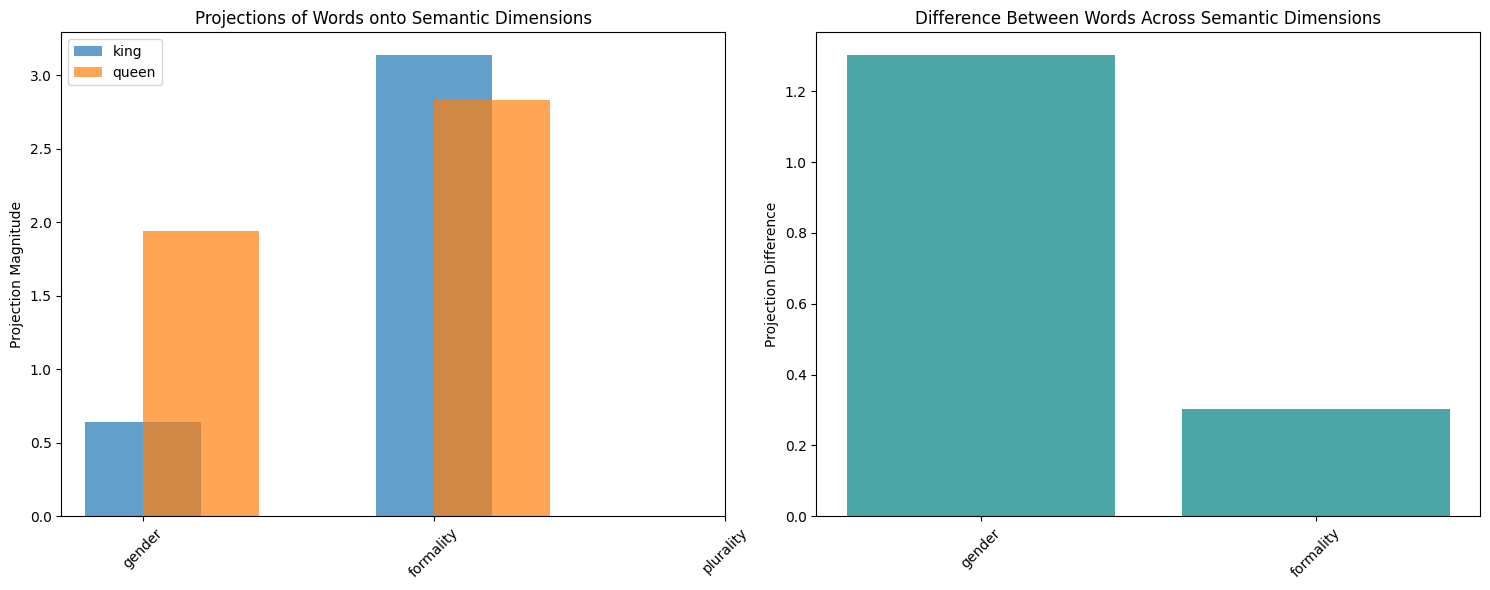

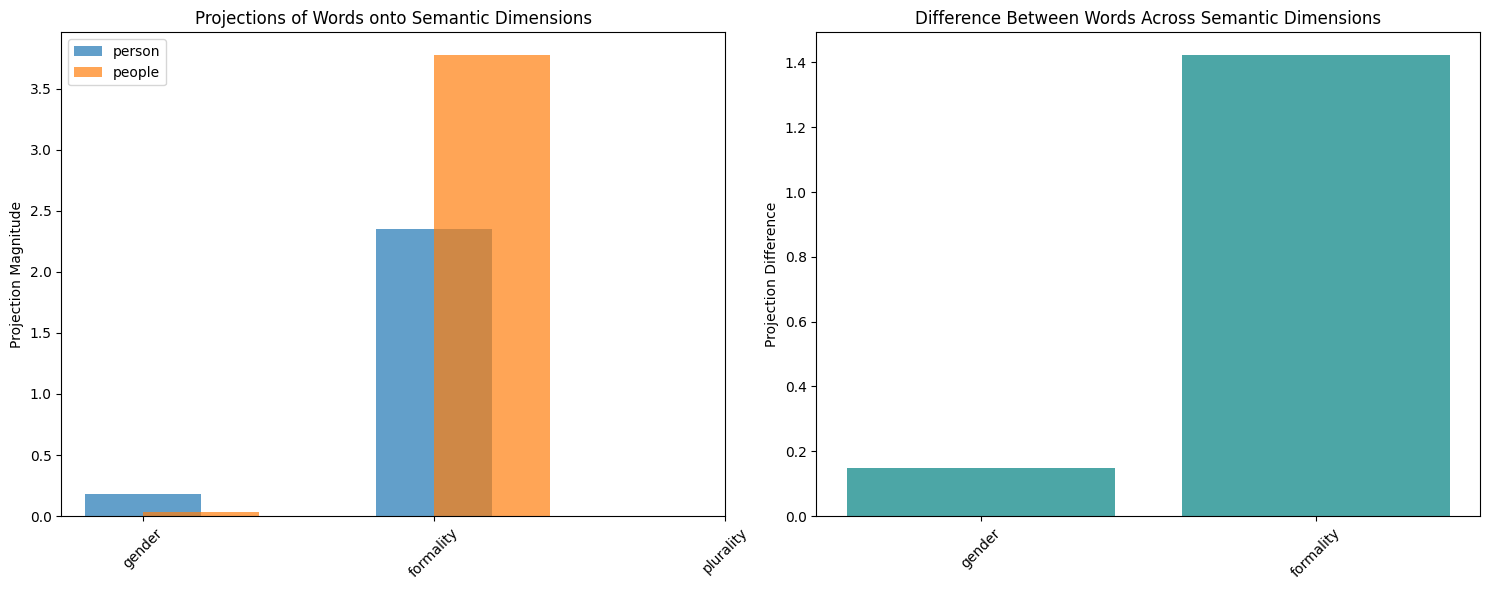

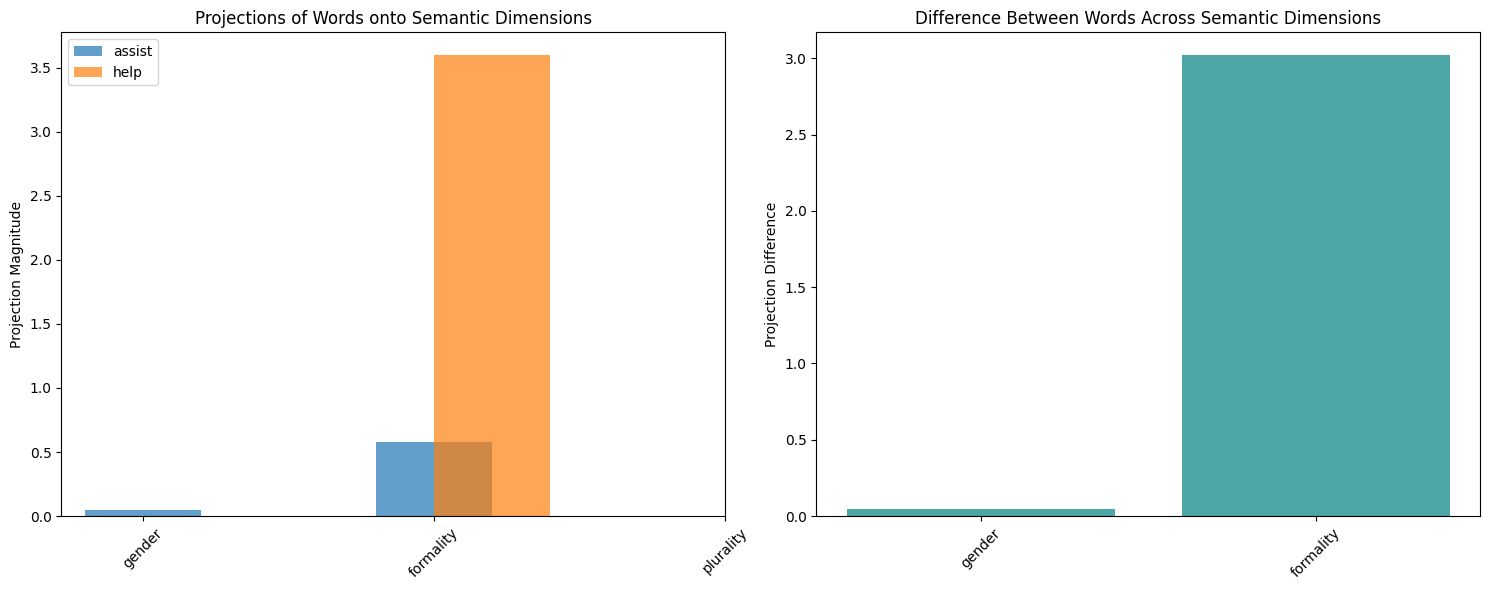

In [22]:
for word1, word2 in [("king", "queen"), ("person", "people"), ("assist", "help")]:
    relationship = analyze_word_relationship(word1, word2, model, SemanticDimensions3)
    plot_semantic_differences(relationship,word1,word2)

--------------------------

The **main objective** of the full project has to be find the best way to distinct synonims by pre-deffined understandable NUANCES

To do it there are many aspects to consider such as:
- The model: For now using Word2Vec, but I would like also to implement a BERT
- The definition of Semantic Dimensions
- The way of comparing the difference between two words to the Semantic Dimensions

Things I would also like to do:
- Fine-tune the model with specific data
- An implementation of this in Catalan 